<a href="https://colab.research.google.com/github/kamalesh003/Predictive-Watering-System/blob/main/Predictive_Watering_System_using_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import joblib

# Load your dataset (replace 'your_file.csv' with the actual file path)
data = pd.read_csv('/content/status.csv')
data

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90,42,43,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85,58,41,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60,55,44,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74,35,40,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78,42,42,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,34,18,38,49,35.25,11.93,3.53,38.71,101.08,6.204802,85.756924,71,60,22,ON
195,28,0,66,10,35.35,11.20,3.34,41.38,101.06,6.158860,82.341629,90,57,24,OFF
196,62,36,25,4,35.24,11.96,2.96,36.08,101.06,6.385684,108.760300,67,35,22,ON
197,88,27,54,63,35.13,12.72,2.58,30.77,101.05,6.417820,70.234016,60,54,19,ON


In [46]:
# Drop rows with missing target values
data.dropna(subset=['Status'], inplace=True)

# Split the data into features (X) and the target variable (y)
X = data.drop('Status', axis=1)
y = data['Status']

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in features using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

# Save the trained model using joblib
joblib.dump(model, 'saved_model.pkl')

['saved_model.pkl']

In [48]:

# Print training accuracy
y_pred = model.predict(X_test_imputed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {accuracy:.2f}")


Training Accuracy: 0.85


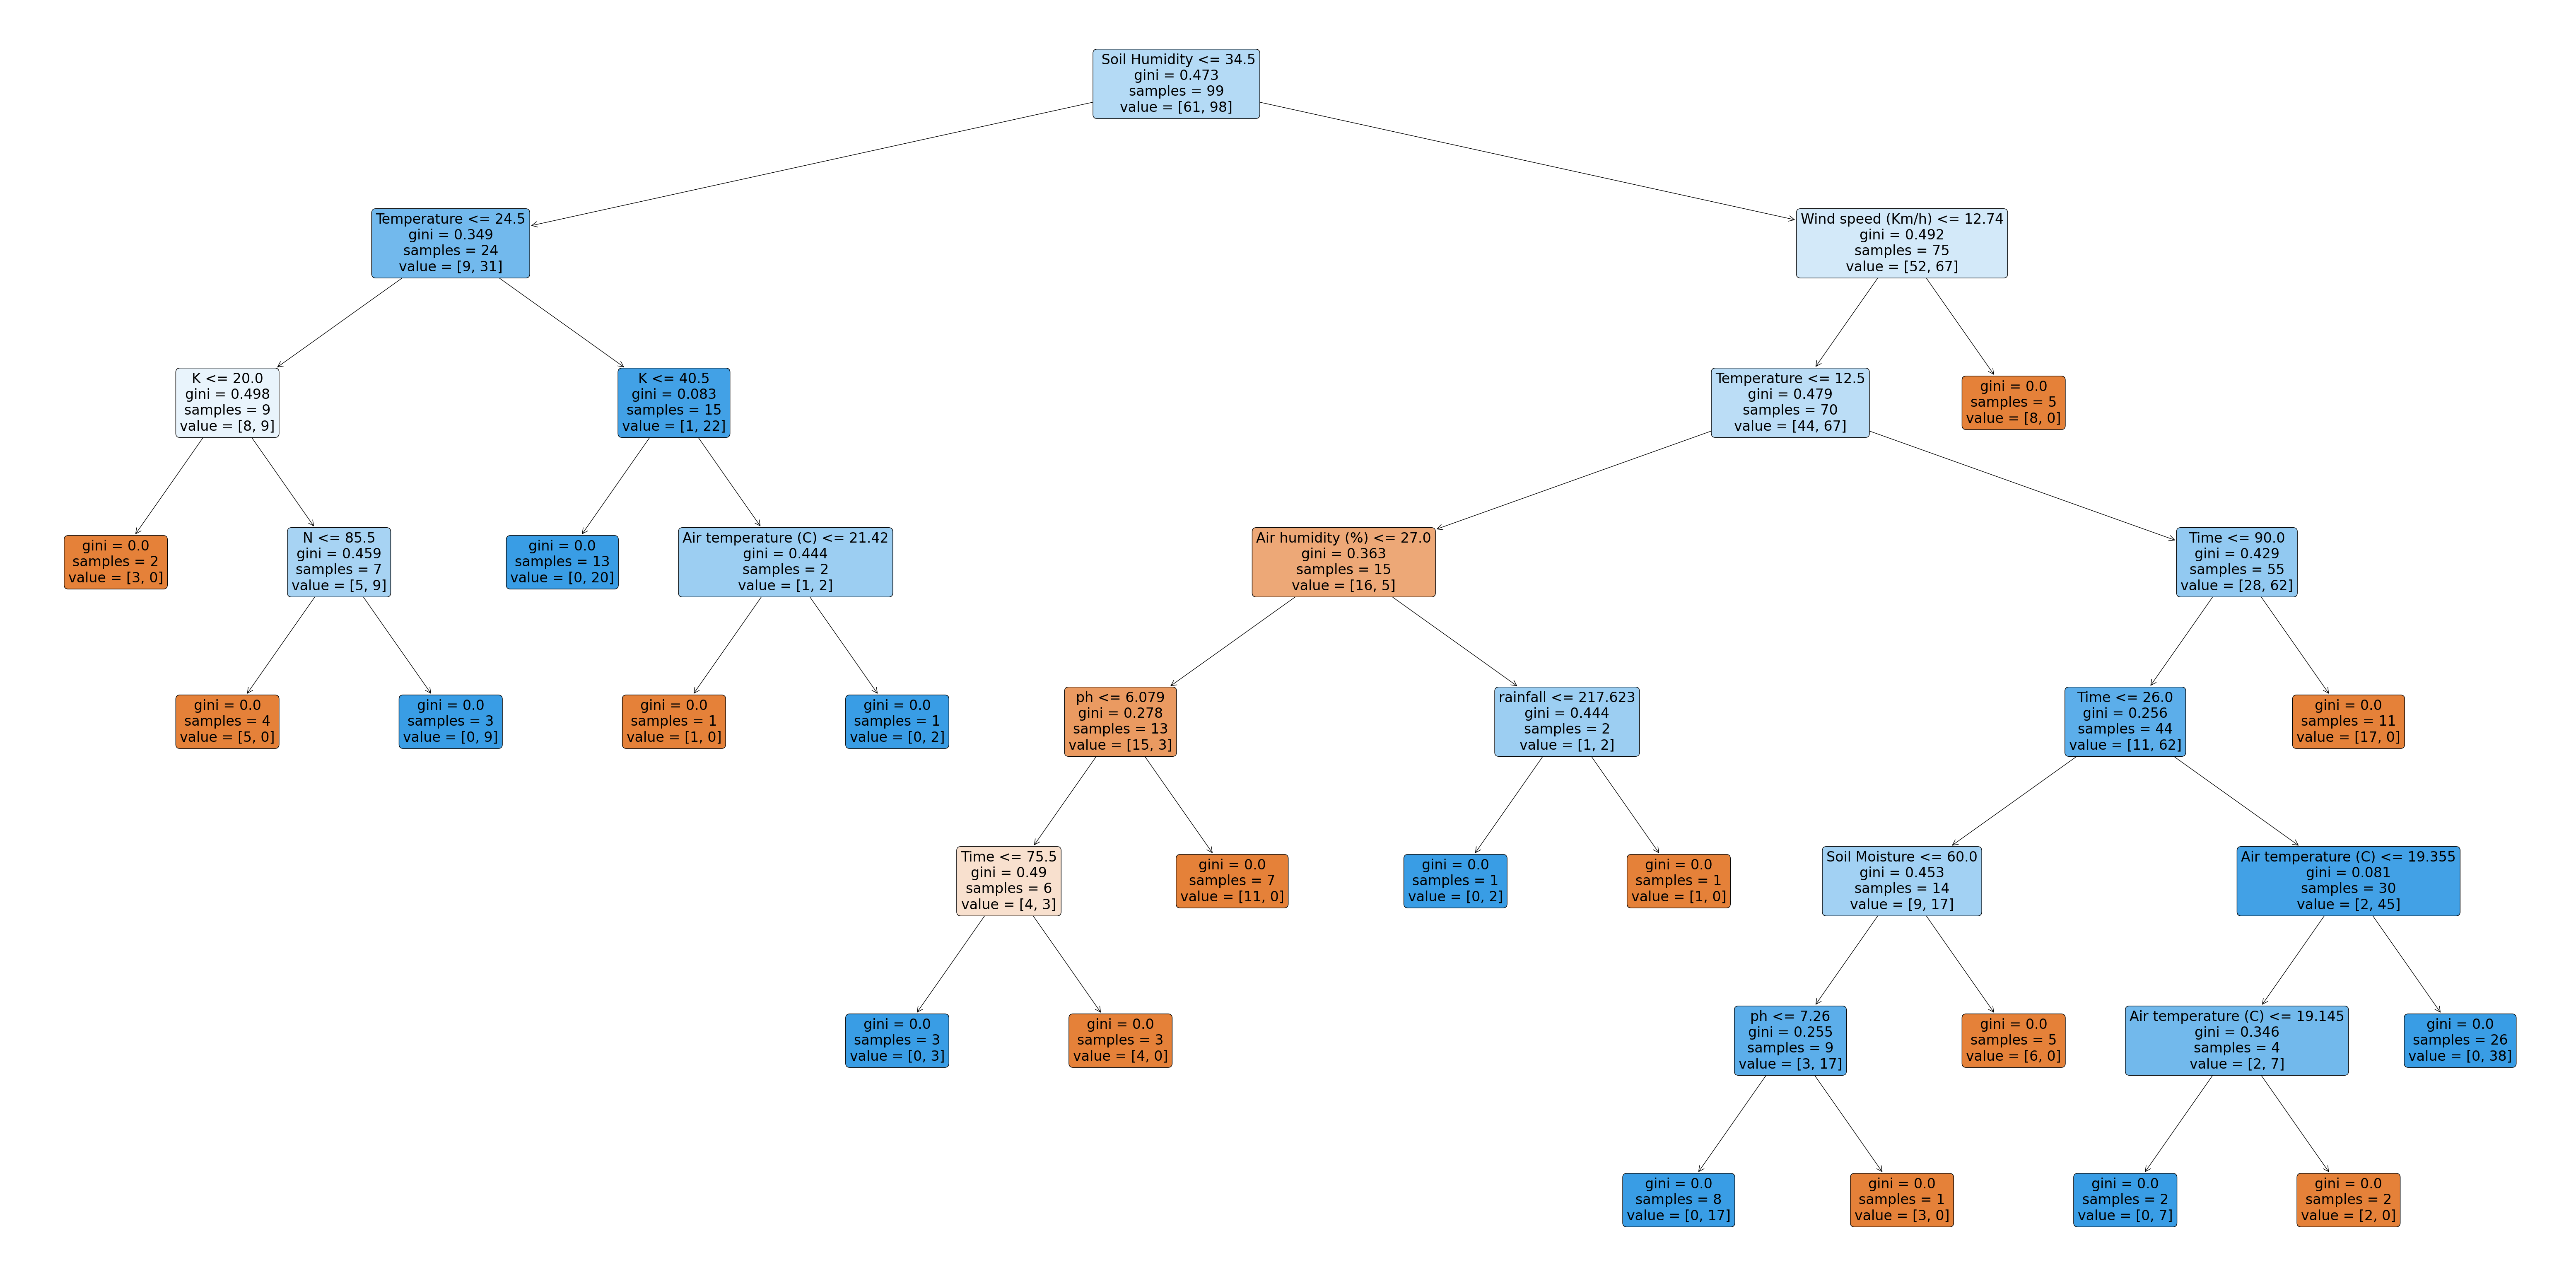

In [49]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained RandomForestClassifier
plt.figure(figsize=(80, 40))
plot_tree(model.estimators_[5], feature_names=X.columns, filled=True, rounded=True)
plt.show()


In [38]:
import joblib
import numpy as np

# Load the trained Random Forest model
loaded_model = joblib.load('saved_model.pkl')

# Define variable names
variable_names = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Time', 'Air Temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)', 'Wind gust (Km/h)', 'Pressure (KPa)', 'pH', 'Rainfall', 'N', 'P', 'K']

# Initialize an empty dictionary to store user inputs
user_inputs = {}

# Gather user inputs for each parameter
for name in variable_names:
    value = float(input(f"Enter {name}: "))
    user_inputs[name] = value

# Convert user inputs into a single input array
single_input = np.array([[user_inputs[name] for name in variable_names]])

# Preprocess the input data (apply the same preprocessing as for training data)

# Make predictions on the single input using the loaded model
predicted_status = loaded_model.predict(single_input)

print("Predicted Status:", predicted_status)


Enter Soil Moisture: 7
Enter Temperature: 44
Enter Soil Humidity: 44
Enter Time: 93
Enter Air Temperature (C): 19.54
Enter Wind speed (Km/h): 2.28
Enter Air humidity (%): 54.2
Enter Wind gust (Km/h): 16.08
Enter Pressure (KPa): 101.51
Enter pH: 6.980400905
Enter Rainfall: 242.8640342
Enter N: 74
Enter P: 35
Enter K: 40
Predicted Status: ['OFF']
